# Underfitting vs. Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [2]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

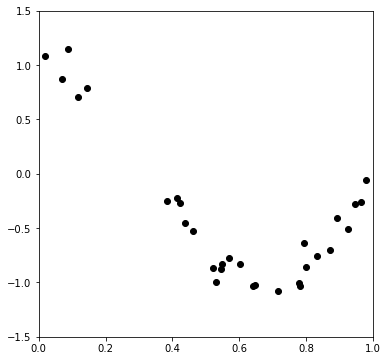

In [3]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

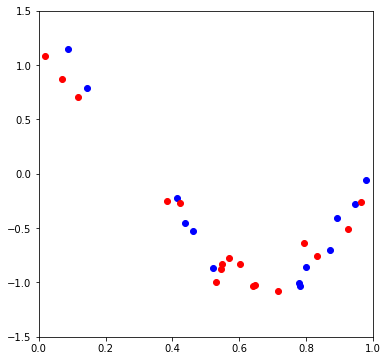

In [4]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics

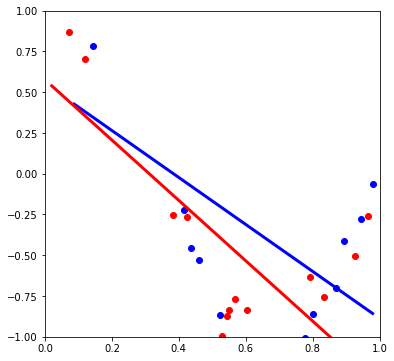

In [6]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1,1])

x1=np.vstack(X1)
model1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model1.fit(x1, y1)
plt.scatter(X1, y1,  color='blue')
plt.plot(x1, model1.predict(x1), color='blue',linewidth=3)

x2=np.vstack(X2)
model2 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model2.fit(x2, y2)
plt.scatter(X2, y2,  color='red')
plt.plot(x2, model2.predict(x2), color='red',linewidth=3)

plt.show()

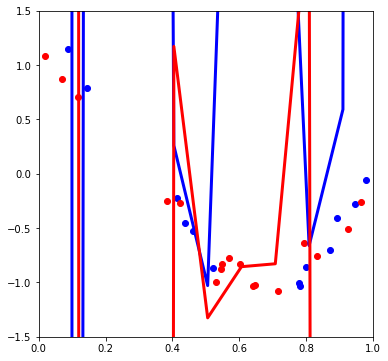

In [7]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])

x_plot = np.vstack(np.linspace(0, 10, 100))

x1=np.vstack(X1)
model1 = make_pipeline(PolynomialFeatures(20), LinearRegression())
model1.fit(x1, y1)
plt.scatter(X1, y1,  color='blue')
plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)

x2=np.vstack(X2)
model2 = make_pipeline(PolynomialFeatures(20), LinearRegression())
model2.fit(x2, y2)
plt.scatter(X2, y2,  color='red')
plt.plot(x_plot, model2.predict(x_plot), color='red',linewidth=3)

plt.show()

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


(-10.0, 1.0)

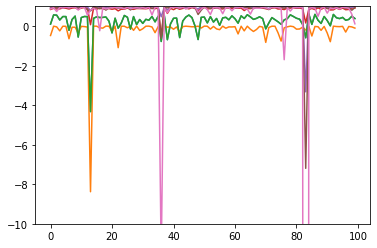

In [12]:
# TODO

from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

df = pd.DataFrame(columns=['model','model1','model2','model3','model4','model5','model6'])

for i in range(100):
    X = np.vstack(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    model = LinearRegression()
    model.fit(X_train,y_train)
    models = [model]
    metric_vec = [ metrics.r2_score(y_test,model.predict(X_test)) ]
    
    for i in range(6):
        model_temp = make_pipeline(PolynomialFeatures(i), LinearRegression())
        model_temp.fit(X_train, y_train)
        models.append(model_temp)
        metric_vec.append(metrics.r2_score(y_test,model_temp.predict(X_test)))
        
    df2 = {'model': metric_vec[0], 'model1': metric_vec[1], 'model2':metric_vec[2],'model3': metric_vec[3], 'model4':metric_vec[4], 'model5':metric_vec[5] , 'model6':metric_vec[6] }

    df = df.append(df2, ignore_index = True)


plt.plot(df.model)
plt.plot(df.model1)
plt.plot(df.model2)
plt.plot(df.model3)
plt.plot(df.model4)
plt.plot(df.model5)
plt.plot(df.model6)
plt.ylim((-10,1))